In [1]:
#Autoencoders Anomaly Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ITU\AppData\Roaming\Pyt

In [4]:
data = pd.read_csv('data/haberman_yeni.csv')
data.head(10)

,Age_of_patient,year_of_operation,positive_axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,60,1,1


In [5]:
print(data.shape)

(299, 4)


In [6]:
X = data.drop("Survival_status", axis = 1)
y = data["Survival_status"]

In [8]:
#Normalizasyon
from sklearn.preprocessing import MinMaxScaler
op = MinMaxScaler(feature_range=(0, 1))
X = op.fit_transform(X)

In [9]:
print(X.shape[1])

3


In [17]:
#Model Mimarisinin Oluşturulması
oznitelik_sayisi = X.shape[1]
girislerin_boyutu = Input(shape = (oznitelik_sayisi,))

darbogaz_boyutu = 2 #darboğaz nöron sayısı

#Encoder
kodlayici = Dense(3, activation = 'relu')(girislerin_boyutu)
kodlayici = Dense(3, activation = 'relu')(girislerin_boyutu)

#Darboğazın tanımlanması
kodlayici = Dense(darbogaz_boyutu, activation = 'relu')(kodlayici)

#Decoder
kod_cozucu = Dense(3, activation = 'relu')(kodlayici)
kod_cozucu = Dense(oznitelik_sayisi, activation = 'sigmoid')(kodlayici)

otokodlayici = Model(inputs = girislerin_boyutu, outputs = kod_cozucu)

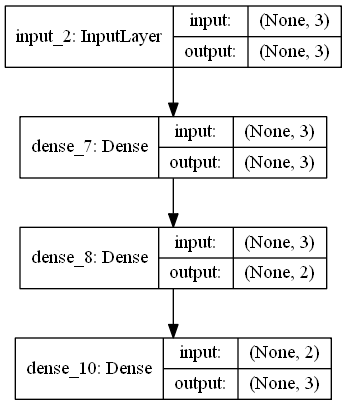

In [18]:
import tensorflow as tf
tf.keras.utils.plot_model(otokodlayici, "haberman1412.png", show_shapes = True, show_layer_names = True)

In [19]:
otokodlayici.compile(
        loss = 'mse',
        optimizer = 'adam')

In [20]:
history = otokodlayici.fit(
            X,
            X,
            epochs = 100,
            batch_size = 16,
            verbose = 2,
            validation_split = 0.2
)


Train on 239 samples, validate on 60 samples
Epoch 1/100
 - 1s - loss: 0.0981 - val_loss: 0.1297
Epoch 2/100
 - 0s - loss: 0.0951 - val_loss: 0.1283
Epoch 3/100
 - 0s - loss: 0.0921 - val_loss: 0.1269
Epoch 4/100
 - 0s - loss: 0.0888 - val_loss: 0.1252
Epoch 5/100
 - 0s - loss: 0.0855 - val_loss: 0.1234
Epoch 6/100
 - 0s - loss: 0.0821 - val_loss: 0.1211
Epoch 7/100
 - 0s - loss: 0.0784 - val_loss: 0.1187
Epoch 8/100
 - 0s - loss: 0.0746 - val_loss: 0.1160
Epoch 9/100
 - 0s - loss: 0.0708 - val_loss: 0.1129
Epoch 10/100
 - 0s - loss: 0.0669 - val_loss: 0.1091
Epoch 11/100
 - 0s - loss: 0.0630 - val_loss: 0.1052
Epoch 12/100
 - 0s - loss: 0.0593 - val_loss: 0.1008
Epoch 13/100
 - 0s - loss: 0.0556 - val_loss: 0.0966
Epoch 14/100
 - 0s - loss: 0.0521 - val_loss: 0.0937
Epoch 15/100
 - 0s - loss: 0.0489 - val_loss: 0.0902
Epoch 16/100
 - 0s - loss: 0.0458 - val_loss: 0.0862
Epoch 17/100
 - 0s - loss: 0.0430 - val_loss: 0.0842
Epoch 18/100
 - 0s - loss: 0.0406 - val_loss: 0.0806
Epoch 19/

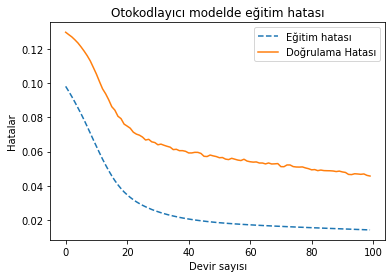

In [21]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Otokodlayıcı modelde eğitim hatası")
plt.xlabel('Devir sayısı')
plt.ylabel('Hatalar')
plt.legend(["Eğitim hatası", "Doğrulama Hatası"], loc = "upper right")
plt.show()

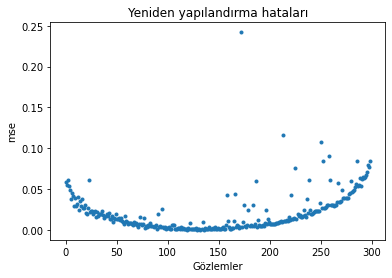

In [22]:
preds = otokodlayici.predict(X)
mse = np.mean(np.power(X - preds, 2), axis = 1)

plt.plot(mse, linewidth = 0, label = 'Eğitim', marker = ".")
plt.title("Yeniden yapılandırma hataları")
plt.ylabel("mse")
plt.xlabel("Gözlemler")
plt.show()

In [23]:
#mse = 0.11
print("\n Eşik değeri giriniz :\n")
thold = float(input())


 Eşik değeri giriniz :

0.11


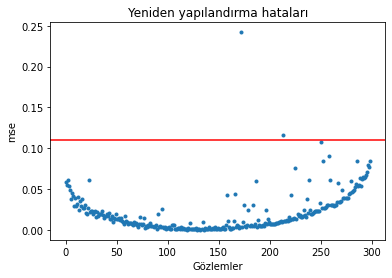

In [24]:
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = ".")
plt.title("Yeniden yapılandırma hataları")
plt.ylabel("mse")
plt.xlabel("Gözlemler")
plt.axhline(y = thold, color = 'r')
plt.show()

In [25]:
anormal = pd.DataFrame(data[mse > thold])
print("Anormal değerlerin sayısı", anormal.shape)

Anormal değerlerin sayısı (2, 4)


In [26]:
print("Anormal Değerler: \n", anormal)

Anormal Değerler: 
      Age_of_patient  year_of_operation  positive_axillary_nodes  \
172              54                 67                       46   
213              59                 62                       35   

     Survival_status  
172                1  
213                2  


In [29]:
anormal_yok = pd.DataFrame(data[mse <= thold])
print("Önceki Veri :", data.shape)

Önceki Veri : (299, 4)


In [28]:
print("Yeni veri :", anormal_yok.shape)

Yeni veri : (297, 4)


In [30]:
output = pd.DataFrame(anormal_yok)
output.to_csv("haberman_anormalsiz.csv", index = False)